<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**EOSC 213**

**Mixing calculations**

**ODEs and Euler’s method**

The objective of this assignment is to create a python program that
computes the concentration of sulfate in time in the water in a tailings
management facility (TMF) at a mine site.

**Problem description and conceptual model**

Sulfate $SO_{4}^{2 -}$ is one of the “major” dissolved constituents in
most terrestrial waters (the others being sodium, calcium, magnesium,
bicarbonate and chloride). Sulfate is not poisonous, but much in the
same way that too much salt makes water undrinkable, too much sulfate
can be too and is thus an environmental concern.

Furthermore, high sulfate concentrations are usually associated with acidic conditions (think about sulfuric acid producing sulfates). In acidic conditions, heavy metals (which are poisonous) might be released from rock dissolution, ... Therefore, monitoring and predicting the sulfate content in groundwater is an essential environmental concern.

We will go back to the TMF problem, where we want to know and assess the sulfate concentration evolution through time.

**Identification of sulfate sources**

To compute the concentration of sulfate in the TMF water, we need to
know where it is coming from and going to and use that knowledge to
develop a conceptual model describing the fate of sulfate in our system. That conceptual model will be translated into a computational model.

The figure below is a conceptual sketch of the main sources and losses
of sulfate in the TMF water:

![](figures/tmf_box.png)

1)  From the pit. To keep the pit dry, water is constantly pumped out of
    the pit and put into the TMF at a rate $Q_{\text{pit}}$
    (L/s of water). The pit water has a sulfate concentration of
    $c_{\text{pit}}$ in mg/L.

2)  From the mill. The tailings are pumped into the TMF as a slurry of
    tailings particles (fine, sand-size ground rock) and water. Assume
    that the water from the mill enters the TMF at a rate of
    $Q_{\text{mill}}\ $ (L/s of water), with a sulfate
    concentration of $c_{\text{mill}}$ (mg/L).

3)  Diffusing from the tailings porewater at the bottom of the TMF into
    the water column above. Sulfate dissolves from the tailings
    particles into the adjacent porewater by oxidation of the sulfide
    minerals in the particles. Because the ratio of rock to water is
    high in the tailings sediments at the bottom, the porewater sulfate
    concentration in the tailings, $c_{\text{pore}}$, is always
    higher than in the water in the TMF. Accordingly, sulfate tends to
    diffuse into the TMF water from the bottom porewater at a rate
    proportional to the difference in concentration between the
    porewater concentration and the concentration in the TMF,
    $c_{\text{TMF}}.$ That is, the flux of sulfate from the bottom can
    be written (a positive quantity when sulfate is entering into the
    TMF):

$j_{\text{pore}} = k\left( c_{\text{pore}} - c_{\text{TMF}} \right)$

where $j_{\text{pore}}\ mg/(s \cdot m^{2})$ is the flux rate of
sulfate per unit area of the bottom of the TMF and $k$ is the flux
coefficient with units of $L/(s \cdot m^{2})$ . To compute
$J_{\text{pore}}$, the total mass flux rate for the whole TMF, with
units of $\frac{\text{mg}}{s}$, we must multiply the rate per unit
area $j_{\text{area}}$ by the total area of the TMF bottom
$A_{\text{bottom}}\ $ in $m^{2}$:

$J_{\text{pore}} = A_{\text{bottom}}{\times j}_{\text{pore}}$

4)  Leaving via the discharge ditch. Sulfate leaves the TMF with the
    water that is discharged at a rate $Q_{\text{discharge}}$ (L/s)
    from the TMF to the environment. SIMPLIFYING ASSUMPTION: if we
    assume that the water in the TMF is well mixed at all times, then
    the concentration in the TMF, $c_{\text{TMF}}$ is the same at all
    points in the TMF, and therefore the water leaving the TMF has that
    same concentration $c_{\text{TMF}}\ $.

**Parameters**

You will need these parameters for your
model

| Symbol                   | Symbol Units                | Description                                                  |&nbsp; &nbsp; &nbsp; &nbsp; Value                   |
| ------------------------ | --------------------- | ------------------------------------------------------------ | ----------------------- |
| $c_{\text{pit}}$       | $mg/L$              | Concentration of sulfate in pit water (assume constant)      | $50$                  |
| $Q_{\text{pit}}$       | $L/s$           | Flow rate of water from the pit into TMF (assume constant)   | 30                   |
| $c_{\text{mill}}$      | $mg/L$              | Concentration of sulfate in mill water (assume constant)     | $700$                 |
| $Q_{\text{mill}}$      | $L/s$           | Flow rate of water from mill into TMF (assume constant)      | 14                   |
| $Q_{\text{discharge}}$ | $L/s$           | Flow rate of water from TMF to environment (assume constant) | 44                   |
| $c_{\text{pore}}$      | $mg/L$              | Concentration of sulfate in porewater at bottom of pond      | 2000                    |
| $k$                    | $L/(s \cdot m^{2})$ | Flux coefficient from porewater to water column              | $2.5 \times 10^{- 5}$ |
| $A_{\text{bottom}}$    | $m^{2}$             | Total area of TMF bottom                                     | $3 \times 10^{5}$     |
| $V_{\text{TMF}}$       | $L$             | Volume of water in TMF at start of simulation                | $8.1 \times 10^{6}$   |
| $c_{0}$                | $mg/L$              | Concentration of sulfate in TMF water at start of simulation | $93$                  |




**Evolution of the mass of water**

First, we will check the evolution of the volume of water in the TMF. Let us denote by $V(t)$ the volume of water in the TMF at every time step.

The flux from the pit and the mill are positive source terms for the volume of water, while the discharge is a negative source term (a sink term). 

Over a certain time $\Delta t$, the amount of water (in L) which is coming in/out the TMF are denoted $S_{\text{pit}}, $S_{\text{mill}}, $S_{\text{dis}} and are equal to

\begin{equation}
\left\lbrace
\begin{array}{lll}
S_{\text{pit}} & = &  Q_{\text{pit}} \Delta t \\
S_{\text{mill}} & = &  Q_{\text{mill}} \Delta t \\
S_{\text{dis}} & = &  Q_{\text{dis}} \Delta t \\
\end{array}
\right.
\end{equation}

Therefore, the volume $V$ of water in the TMF over the period [$t$;$t+\Delta t]$ is:

\begin{equation}
\begin{array}{llll}
& V(t+\Delta t) & = &  V(t) + S_{\text{pit}} + S_{\text{mill}} - S_{\text{dis}} \\
\Longleftrightarrow & V(t+\Delta t) & = &  Q_{\text{pit}} \Delta t + Q_{\text{mill}} \Delta t - Q_{\text{dis}} \Delta t \\
\Longleftrightarrow & \frac{V(t+\Delta t)-V(t)}{\Delta t} & = &  Q_{\text{pit}}  + Q_{\text{mill}}  - Q_{\text{dis}}  \\
\end{array}
\end{equation}

Considering the values given, we have:

\begin{equation}
\frac{V(t+\Delta t)-V(t)}{\Delta t} = 30 + 14 - 44 = 0 \Longleftrightarrow V(t) = V_0
\end{equation}

Indicating that the volume of water is constant through time.

Let's assigne a variable whose value is the volume of water in the TMF:

In [1]:
V0 = 8.1e9 # volume of water in L

**Evolution of the mass of sulfates**

We have 4 main processes impacting the quantity of sulfates in the TMF. We will compute the evolution of this mass over time. First, initialize the required variable (initial mass, and the different input parameters).




In [2]:
c0 = 93 # initial concentration
Q_pit = 30
Q_mill = 14
Q_dis = 44

c_pit = 50
c_pore = 2000
c_mill = 700

k = 2.5e-5
Area = 3e5

#Initial mass of sulfates = Volume of water * c0
m0 = c0*V0
m0

753300000000.0

1. Advective flux from the pit and the mill

We have a source of sulfates from the pit. Over a certain time $\Delta t$, the volume of water coming from the pit is $S_{\text{pit}} = Q_{\text{pit}} \Delta t$. This volume of water has a sulfate concentration corresponding to the pit concentration. So, the total mass of sulfate from the pit which arrived in the pit over the same period, $M_{\text{pit}}$ is simply:
\begin{equation}
M_{\text{pit}} = S_{\text{pit}}  c_{\text{pit}} = Q_{\text{pit}}  c_{\text{pit}} \Delta t
\end{equation}

You can always check the units:
\begin{equation}
\overbrace{M_{\text{pit}}}^{mg} = \overbrace{Q_{\text{pit}}}^{L/s}  \, \overbrace{c_{\text{pit}}}^{mg/L} \, \overbrace{\Delta t}^{s}
\end{equation}


Compute the mass of sulfates after 1 day if the pit is the only source of sulfate. Create a variable S_pit corresponding to the mass of sulfates brought by the pit.



In [3]:
dt = 1 # day
Seconds_in_a_day = 24*3600
dt = dt*Seconds_in_a_day
m = m0 + Q_pit*c_pit*dt
S_pit = Q_pit*c_pit*dt

S_pit

129600000

2. Advective flux from the mill

Do the same if we only consider the mill as a sulfate source. (name of the variable = S_mill)



In [4]:
m = m0 + Q_mill*c_mill*dt
S_mill = Q_mill*c_mill*dt
S_mill

846720000

3. Discharge flux from the TMF

The same development can be performed for the discharge of water. The volume of water leaving the TMF over a certain period $\Delta t$ is $S_{\text{dis}} = Q_{\text{dis}} \Delta t$. The concentration of sulfates in this volume corresponds to the concentration of sulfates in the TMF $c_{\text{TMF}}$, so that we can write:

\begin{equation}
M_{\text{dis}} = Q_{\text{dis}}  c_{\text{TMF}} \Delta t
\end{equation}

How will the discharge change the mass of sulfates over one day? Create a variable called S_dis which stores that value.


In [5]:
m = m0 - Q_dis*c0*dt
S_dis = Q_dis*c0*dt
S_dis

353548800

4. First order mass transfer

The mass flux was written as:
\begin{equation}
J_{\text{pore}} = \overbrace{A_{\text{bottom}}}^{m^2} \overbrace{k}^{L . s^{-1} . m^{-2}}  \left( \overbrace{c_{\text{pore}} - c_{\text{TMF}}}^{mg . L^{-1}} \right)
\end{equation}
which is in the units of mg/s. If this flux is constant over time, the added mass of sulfates over a certain time $\Delta t$ corresponds to the latter quantity multiplied by the the quantity $J_{\text{pore}}$ multiplied by $\Delta t$:

\begin{equation}
M_{\text{pore}} = A_{\text{bottom}} k \left( c_{\text{pore}} - c_{\text{TMF}}  \right) \Delta t
\end{equation}

How will this mass transfer impact the mass of sulfate? Create a variable S_pore which stores the value of the sulfate brought by this first order mass transfer


In [6]:
m = m0 + Area * k * (c_pore-c0) * dt
S_pore = Area * k * (c_pore-c0) * dt
print(S_pore)

1235736000.0


Now, compute the total evolution of the mass of sulfates after one day, and print its value and how it has changed.


In [7]:
m = m0 + S_pore + S_pit + S_mill - S_dis
print(S_pore)
print(S_pit)
print(S_mill)
print(S_dis)
S_pore + S_pit + S_mill - S_dis

1235736000.0
129600000
846720000
353548800


1858507200.0

This is the mass, to compute the new concentration, we have to divide by the mass of water. 

In [8]:
c = m/V0
c

93.22944533333333

We can see that concentration has increased by only 0.2%.

We have computed the evolution of the mass of sulfates in the TMF after one day. Let us apply the same method over a large period of time, using daily timesteps again. Let's say we want to model the evolution of the mass over a period of 10 years. Create and initialize the required arrays.


In [9]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Before setting an array, it is better to know its size.


In [10]:
Tf = 10 # years
n = 365*Tf # 1 calculation per day, for Tf years

m = np.zeros(n, float)
c = np.zeros(n, float)
Spit = np.zeros(n,float)
Smill = np.zeros(n,float)
Sdis = np.zeros(n,float)
Spore = np.zeros(n,float)
time = np.zeros(n,float)
discharge = np.zeros(n,float)

Then, let us initialize the initial values.


In [11]:
m[0] = m0
c[0] = c0

Then, we need to compute these terms at every timesteps, by looping over the different times


In [12]:
for i in range(n - 1):
    S_pit = Q_pit*c_pit
    S_mill = Q_mill*c_mill
    S_dis = Q_dis*c[i]
    S_pore = Area*k*(c_pore-c[i])
    
    Spit[i+1] = S_pit*dt/1e6
    Smill[i+1] = S_mill*dt/1e6
    Sdis[i+1] = S_dis*dt/1e6
    Spore[i+1] = S_pore*dt/1e6
    
    m[i+1] = m[i] + (S_pore + S_pit + S_mill - S_dis)*dt
    discharge[i+1] = discharge[i] + (S_pore + S_pit + S_mill - S_dis)*dt/1e6
    c[i+1] = m[i+1]/V0
    time[i+1] = i/365 #time in years
    
    

The calculation is now performed, let us look at the results using matplotlib.

[Text(0, 0.5, 'discharge (kg)'), Text(0.5, 0, 'Time (years)')]

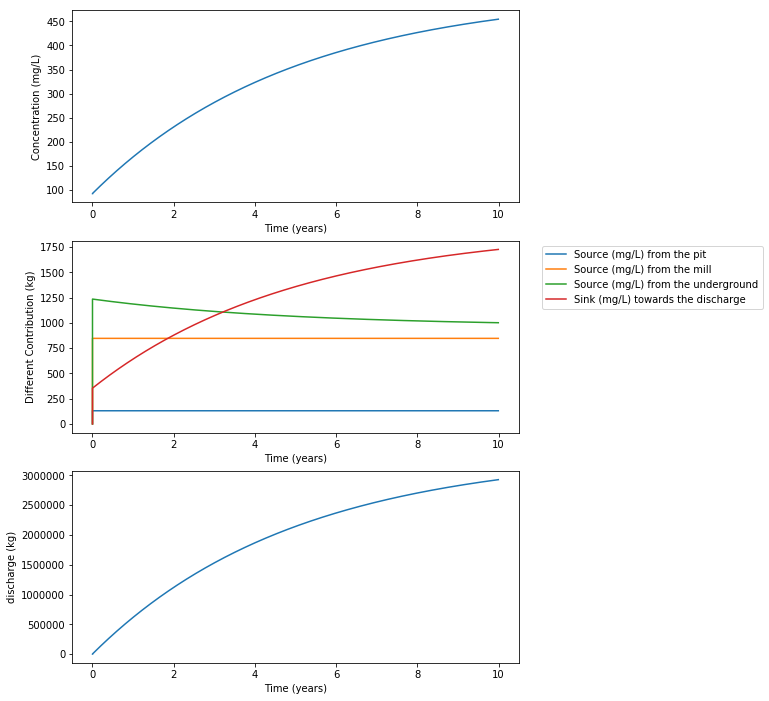

In [24]:
# call a figure with two plots, vertically stacked, sharing x(time) axis

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# First plot is the evolution of concentration

ax1.plot(time, c, label="Concentration")
ax1.set(xlabel="Time (years)",ylabel="Concentration (mg/L)")


# Second plot is the relative contribution to the concentration

ax2.plot(time, Spit, label="Source (mg/L) from the pit")
ax2.plot(time, Smill, label="Source (mg/L) from the mill")
ax2.plot(time, Spore, label="Source (mg/L) from the underground")
ax2.plot(time, Sdis, label="Sink (mg/L) towards the discharge")
ax2.set(xlabel="Time (years)", ylabel="Different Contribution (kg)")
ax2.legend(loc='upper center', bbox_to_anchor=(1.3, 1));

ax3.plot(time, discharge, label="Discharge")
ax3.set(xlabel="Time (years)",ylabel="discharge (kg)")

**Mass balance**

Therefore, if the mass of sulfates at a certain time $t_0$ $m(t)$ is $m(t_0) = m_0$, the mass of sulfates at $t+\Delta t$ is:
\begin{equation}
\begin{array}{llll}
& m(t_0 + \Delta t) & = & m(t_0) + M_{\text{pit}} + M_{\text{mill}} + M_{\text{pore}} - M_{\text{dis}} \\
\Longleftrightarrow & m(t_0 + \Delta t) & = & m(t_0) + \left(Q_{\text{pit}}  c_{\text{pit}} + Q_{\text{mill}}  c_{\text{mill}} + A_{\text{bottom}} k \left( c_{\text{pore}} - c_{\text{TMF}}  \right)    -Q_{\text{dis}} c_{\text{TMF}}\right) \Delta t \\
\Longleftrightarrow & \frac{m(t_0 + \Delta t)-m(t_0)}{\Delta t} & = &  Q_{\text{pit}}  c_{\text{pit}} + Q_{\text{mill}}  c_{\text{mill}} + A_{\text{bottom}} k \left( c_{\text{pore}} - c_{\text{TMF}}  \right)    -Q_{\text{dis}} c_{\text{TMF}}  \\
\end{array}
\end{equation}

The link between concentration and mass of sulfates is the volume of water
\begin{equation}
c_{\text{TMF}}(t) = \frac{m(t)}{V(t)}
\end{equation}

But, since the volume of water is constant, we have:
\begin{equation}
c_{\text{TMF}}(t) = \frac{m(t)}{V_0}
\end{equation}

Therefore, if we divide the latter equation by $V_0$, we have:
\begin{equation}
\frac{c_{\text{TMF}}(t_0 + \Delta t)-c_{\text{TMF}}(t_0)}{\Delta t} =  \frac{Q_{\text{pit}}  c_{\text{pit}} + Q_{\text{mill}}  c_{\text{mill}} + A_{\text{bottom}} k \left( c_{\text{pore}} - c_{\text{TMF}}  \right)    -Q_{\text{dis}} c_{\text{TMF}}}{V_0}
\end{equation}

Going to the limit $\Delta t \rightarrow 0$ (i.e. $\Delta t= dt$), this becomes:
\begin{equation}
\frac{dc_{\text{TMF}}}{dt} =  \frac{Q_{\text{pit}}  c_{\text{pit}} + Q_{\text{mill}}  c_{\text{mill}} + A_{\text{bottom}} k \left( c_{\text{pore}} - c_{\text{TMF}}  \right)    -Q_{\text{dis}} c_{\text{TMF}}}{V_0}
\end{equation}
which is a 1$^{st}$ order linear ODE.